In [33]:
from os.path import join
import numpy as np
import pandas as pd
from nilearn import plotting
from nilearn import regions, maskers, masking, image, surface
from nilearn import regions, maskers, masking, image, surface
from nilearn.datasets import (load_mni152_template)


In [32]:
main_dir = '/Users/h/Dropbox/projects_dropbox/cerebellar_atlases'
cerebellum = join(main_dir,'King_2019', 'atl-MDTB10_space-MNI_dseg.nii')
cerebellum_label = join(main_dir, 'King_2019', 'atl-MDTB10.tsv')


(141, 95, 87)

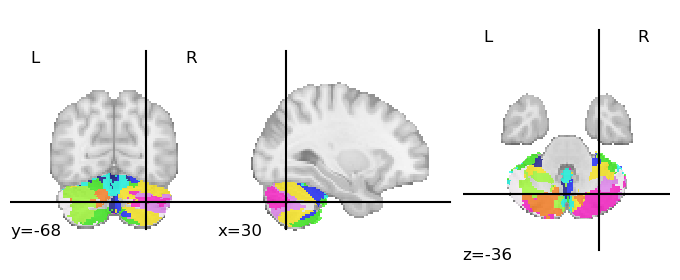

In [44]:
plotting.plot_roi(cerebellum)
cerebellum_atlas = image.load_img(cerebellum)
cerebellum_atlas.shape


In [36]:
labels

,index,name,color
0,1,Region1,#2ea698
1,2,Region2,#549720
2,3,Region3,#336693
3,4,Region4,#0e187d
4,5,Region5,#a517a2
5,6,Region6,#af2b46
6,7,Region7,#e17db0
7,8,Region8,#eca108
8,9,Region9,#fbd975
9,10,Region10,#7775f5


In [46]:
nifti_masker.fit()
masker.generate_report()

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:337: UserWarning: No image provided to fit in NiftiMasker. Setting image to mask for reporting.
  warnings.warn(msg)


Parameter,Value
detrend,False
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
mask_args,None
mask_img,"<class 'nibabel.nifti1.Nifti1Image'> data shape (141, 95, 87) affine: [[ 1. 0. 0. -70.] [ 0. 1. 0. -100.] [ 0. 0. 1. -75.] [ 0. 0. 0. 1.]] metadata: <class 'nibabel.nifti1.Nifti1Header'> object, endian='<' sizeof_hdr : 348 data_type : b'' db_name : b'' extents : 0 session_error : 0 regular : b'' dim_info : 0 dim : [ 3 141 95 87 1 1 1 1] intent_p1 : 0.0 intent_p2 : 0.0 intent_p3 : 0.0 intent_code : none datatype : uint8 bitpix : 8 slice_start : 0 pixdim : [1. 1. 1. 1. 1. 1. 1. 1.] vox_offset : 0.0 scl_slope : nan scl_inter : nan slice_end : 0 slice_code : unknown xyzt_units : 0 cal_max : 0.0 cal_min : 0.0 slice_duration : 0.0 toffset : 0.0 glmax : 0 glmin : 0 descrip : b'' aux_file : b'' qform_code : unknown sform_code : aligned quatern_b : 0.0 quatern_c : 0.0 quatern_d : 0.0 qoffset_x : -70.0 qoffset_y : -100.0 qoffset_z : -75.0 srow_x : [ 1. 0. 0. -70.] srow_y : [ 0. 1. 0. -100.] srow_z : [ 0. 0. 1. -75.] intent_name : b'' magic : b'n+1'"
mask_strategy,background
memory,Memory(location=None)
memory_level,1


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:98: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


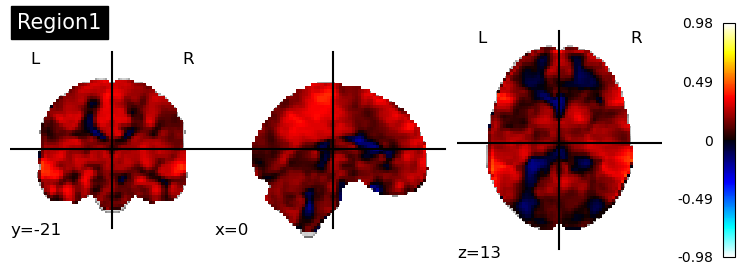

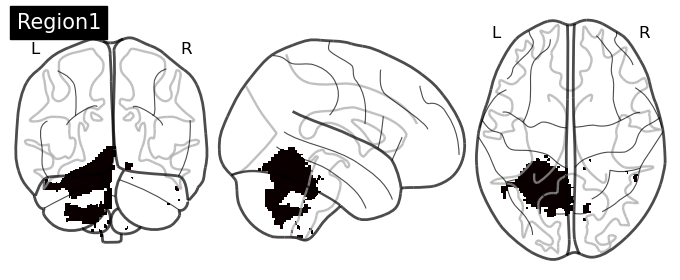

In [55]:
# cerebellum = join(cerebellum_dir,'King_2019', 'atl-MDTB10_space-MNI_dseg.nii')
cerebellum_atlas = image.load_img(cerebellum)
# cerebellum_label = join(main_dir, 'King_2019', 'atl-MDTB10.tsv')
labels = pd.read_csv(cerebellum_label, sep='\t')

template = load_mni152_template(resolution=3)
# subcortex_atlas = image.load_img(subcortex)
# cerebellum_img = image.resample_to_img(cerebellum_atlas, template) #, target_affine=ref_img.affine, target_shape=ref_img.shape)
nifti_masker = maskers.NiftiMasker(mask_img=masking.compute_epi_mask(template))
atlas_index=0
atlas_label = labels.loc[atlas_index, 'name']
region_mask = (cerebellum_atlas.get_fdata() == atlas_index + 1)
masked_roi = image.new_img_like(cerebellum_atlas, region_mask)

high_cue = '/Users/h/Documents/projects_local/sandbox/cue/sub-avg_ses-avg_run-avg_task-pain_event-stimulus_cuetype-high.nii.gz'
ref_img = image.load_img(high_cue)
masked_data = nifti_masker.fit_transform(ref_img)
masked_img = nifti_masker.inverse_transform(masked_data)
plotting.plot_stat_map(masked_img, title=f"{atlas_label}")
# plotting.glass_brain(masked_img, title=f"{atlas_label}")
plotting.plot_glass_brain(masked_roi, title=f"{atlas_label}")

In [ ]:
cerebellum_atlas = image.load_img(cerebellum)
cerebellum_atlas.shape

In [17]:
atlas_index = 0
atlas_label = labels.loc[atlas_index, 'name']
atlas_label

'Region1'

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:98: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


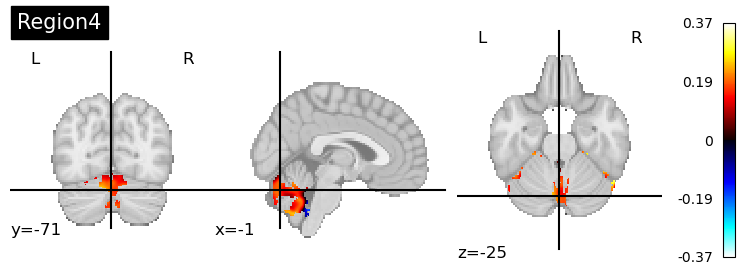

In [15]:
high_cue = '/Users/h/Documents/projects_local/sandbox/cue/sub-avg_ses-avg_run-avg_task-pain_event-stimulus_cuetype-high.nii.gz'
ref_img = image.load_img(high_cue)
canlab_dir = '/Users/h/Documents/MATLAB/CanlabCore'
mask = image.load_img(join(canlab_dir, 'CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_canlab.nii'))
# get region index
atlas_index = 0
atlas_label = labels.loc[atlas_index, 'name']
region_mask = (cerebellum_atlas.get_fdata() == atlas_index)
masked_roi = image.new_img_like(cerebellum_atlas, region_mask)
masker = maskers.NiftiMasker(mask_img=masked_roi)
masked_data = masker.fit_transform(ref_img)
masked_img = masker.inverse_transform(masked_data)
plotting.plot_stat_map(masked_img, title=f"{atlas_label}")

In [19]:
141*95*87

1165365

In [18]:
masked_img.shape

(141, 95, 87, 1)

In [13]:
from nilearn import datasets
fsaverage = datasets.fetch_surf_fsaverage()
curv_right = surface.load_surf_data(fsaverage.curv_right)
curv_right_sign = np.sign(curv_right)

# plotting.plot_surf(stat_map_img=masked_img,
#                    #subject='subject_id', subject_dir='subject_dir',
#                    hemi='left', view='lateral', colorbar=True,
#                    title='Statistical Map')
surface_data = surface.load_surf_data('/Users/h/Dropbox/projects_dropbox/cerebellar_atlases/King_2019/atl-MDTB10_dseg.label.gii')
# texture = surface.vol_to_surf(ref_img, surface_data) #fsaverage.pial_right)
# Display the plot
fig = plotting.plot_surf_stat_map(
    surface_data, surface_data, hemi='right',
    title='Surface right hemisphere', colorbar=True,
    threshold=1., bg_map=surface_data,
)
plotting.show()

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/img_plotting.py:98: RuntimeWarning: overflow encountered in scalar negative
  vmin = -vmax


ValueError: The input type is not recognized. Valid inputs are one of the following file formats: .gii, .gii.gz, Freesurfer specific files such as '.orig', '.pial', '.sphere', '.white', '.infla'or two Numpy arrays organized in a list, tuple or a namedtuple with the fields "coordinates" and "faces"

In [15]:
fig = plotting.plot_surf(
    surface_data, hemi='right',
    title='Surface right hemisphere', colorbar=True,
    threshold=1., bg_map=surface_data,
)
plotting.show()

ValueError: The input type is not recognized. Valid inputs are one of the following file formats: .gii, .gii.gz, Freesurfer specific files such as '.orig', '.pial', '.sphere', '.white', '.infla'or two Numpy arrays organized in a list, tuple or a namedtuple with the fields "coordinates" and "faces"